# Produção do Guaraná no Brasil

Tabela 6588 - Série histórica da estimativa anual da área plantada, área colhida, produção e rendimento médio dos produtos das lavouras

__Fonte:__ [IBGE - Levantamento Sistemático da Produção Agrícola](https://sidra.ibge.gov.br/tabela/6588#)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

#### Leitura e tratamento da base

In [2]:
df = pd.read_excel("bases/Tabela 6588.xlsx", skiprows=4).rename({"Unnamed: 0": "estado"}, axis=1)

# -- 

df.drop(df.index[-1], inplace=True)
df = pd.melt(df, id_vars=["estado"], var_name="periodo", value_name="toneladas")
df.toneladas = df.toneladas.replace('...', np.nan)
df.toneladas = df.toneladas.replace('-', 0)
df.dropna(inplace=True)
df.toneladas = df.toneladas.astype(int)

Ajusta o formato da data:

In [3]:
meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 
         'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']

df.periodo = df.periodo.apply(lambda x: '{}/{}'.format(meses.index(x.split(' ')[0])+1, x.split(' ')[1]))
df.periodo = pd.to_datetime(df.periodo, format="%m/%Y")
df = df.set_index('periodo')

### Análise da producação nacional/geral do guaraná 

In [4]:
df_geral = df.copy()
df_geral = df_geral.groupby(["periodo"], as_index=True).agg({"toneladas": sum})

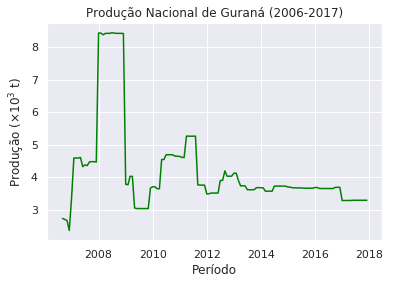

In [14]:
fig, ax = plt.subplots()
ax.plot(df_geral.loc[:, 'toneladas'], linewidth=1.5, color='green')

ax.set_ylabel('Produção (' + r'$\times10^3$ t)')
ax.set_xlabel('Período')
ax.set_title('Produção Nacional de Guraná (2006-2017)')

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.yaxis.get_offset_text().set_visible(False)